# 2. Importing Necessary Libraries


● Projede kullanılacak olan kütüphanelerin Colab ortamına ekleyiniz.
● Pandas, numpy, Seaborn, Matplotlib ve Sklearn kütüphanelerini ekleyiniz.

In [ ]:
from os.path import join
from google.colab import drive
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from matplotlib.cm import rainbow
import plotly.express as px
import matplotlib.colors as mcolors
from matplotlib.colors import TwoSlopeNorm
from termcolor import colored

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

##Preparing the Dataset

In [ ]:
#Read Data 
drive.mount("/content/drive", force_remount=True)
path_prefix = "/content/drive/My Drive"


Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/insurance.csv")

In [ ]:
def check_df(df, head=5, tail=5):
    print(" SHAPE ".center(70, '*'))
    print('Observations -------> {}'.format(df.shape[0]))
    print('Features     -------> {}'.format(df.shape[1]))
    print(f"Shape of dataset: {colored(df.shape, 'red')}")
    print(" TYPES OF FEATURES ".center(70, '*'))
    print(df.dtypes,"\n")
    print(" HEAD ".center(70, '*'))
    print("\n",df.head(head),"\n")
    print(' TAIL '.center(70, '*'))
    print("\n",df.tail(tail),"\n")
    print(" INFO ".center(70, "*"))
    print("\n",df.info(),"\n")
    print(' DUPLICATE VALUE ANALYSIS '.center(70, '*'))
    print("\n",df.duplicated().sum(),"\n")
    print(" QUANTILES ".center(70, '*'))
    print("\n",df.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T,"\n")


check_df(df)

******************************* SHAPE ********************************
Observations -------> 1338
Features     -------> 7
Shape of dataset: (1338, 7)
************************* TYPES OF FEATURES **************************
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object 

******************************** HEAD ********************************

    age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520 

******************************** TAIL ********************************

       age     sex    bmi  children smoker     region     charges
1333   50    male  30.97  

In [ ]:
df.describe().T
# When we look through statistical values we can say that data has cohesive distribution

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There is not any null value.

# 3. Keşifsel Veri Analizi Yapılması

##Verilerin birbirleriye olan genel ilişkisi

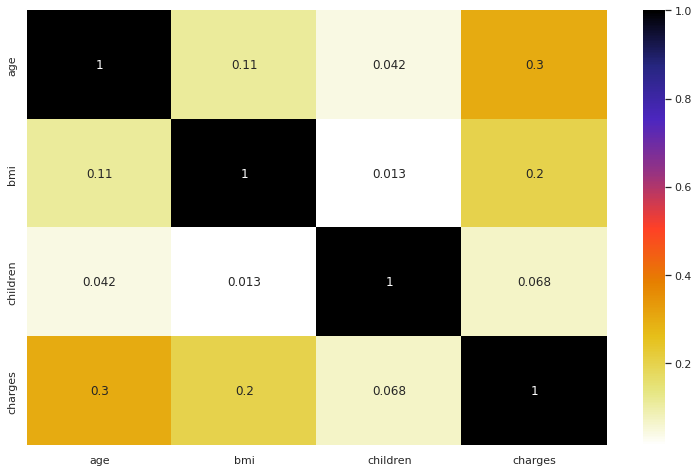

In [ ]:
plt.figure(figsize=(13,8))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

## Bmi (Vücut Kitle İndeksi)’nin dağılımını inceleyiniz

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



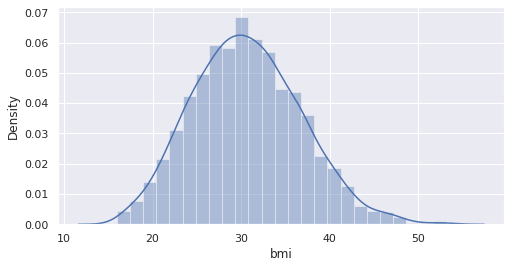

In [ ]:
sns.set(rc={"figure.figsize": (8, 4)}); np.random.seed(0)
x = df['bmi']
ax = sns.distplot(x)
plt.show()
# Normal distribution

In [ ]:
print('\n Distribution of BMI\n'.center(70,"*"))
print('Mean of BMI:',df['bmi'].mean())
print('Median of BMI:',df['bmi'].median())
print('Mode of BMI:',df['bmi'].mode())

************************
 Distribution of BMI
************************
Mean of BMI: 30.66339686098655
Median of BMI: 30.4
Mode of BMI: 0    32.3
dtype: float64


In [ ]:
corr = df.corr()
corr

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


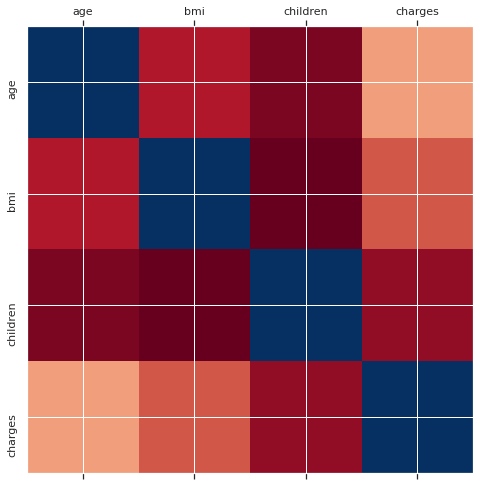

In [ ]:
fig = plt.figure(figsize=(8,8))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)
plt.yticks(range(len(corr.columns)), corr.columns, rotation='vertical');
plt.xticks(range(len(corr.columns)), corr.columns);
# We see that insurance costs are mostly related to age and less number of children.

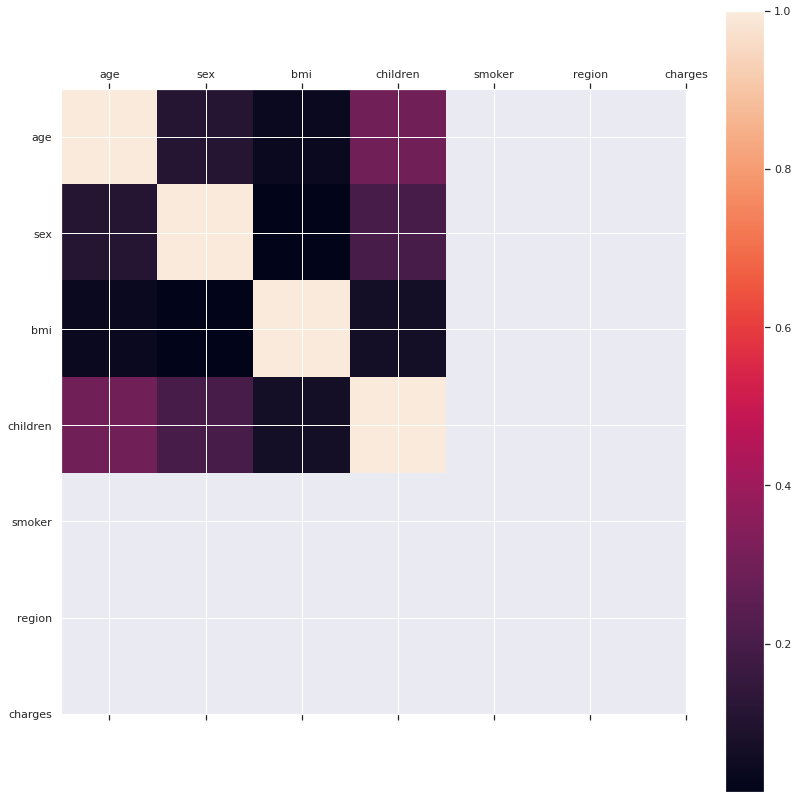

In [ ]:
rcParams['figure.figsize'] = 20, 14
plt.matshow(df.corr())
plt.yticks(np.arange(df.shape[1]), df.columns)
plt.xticks(np.arange(df.shape[1]), df.columns)
plt.colorbar();

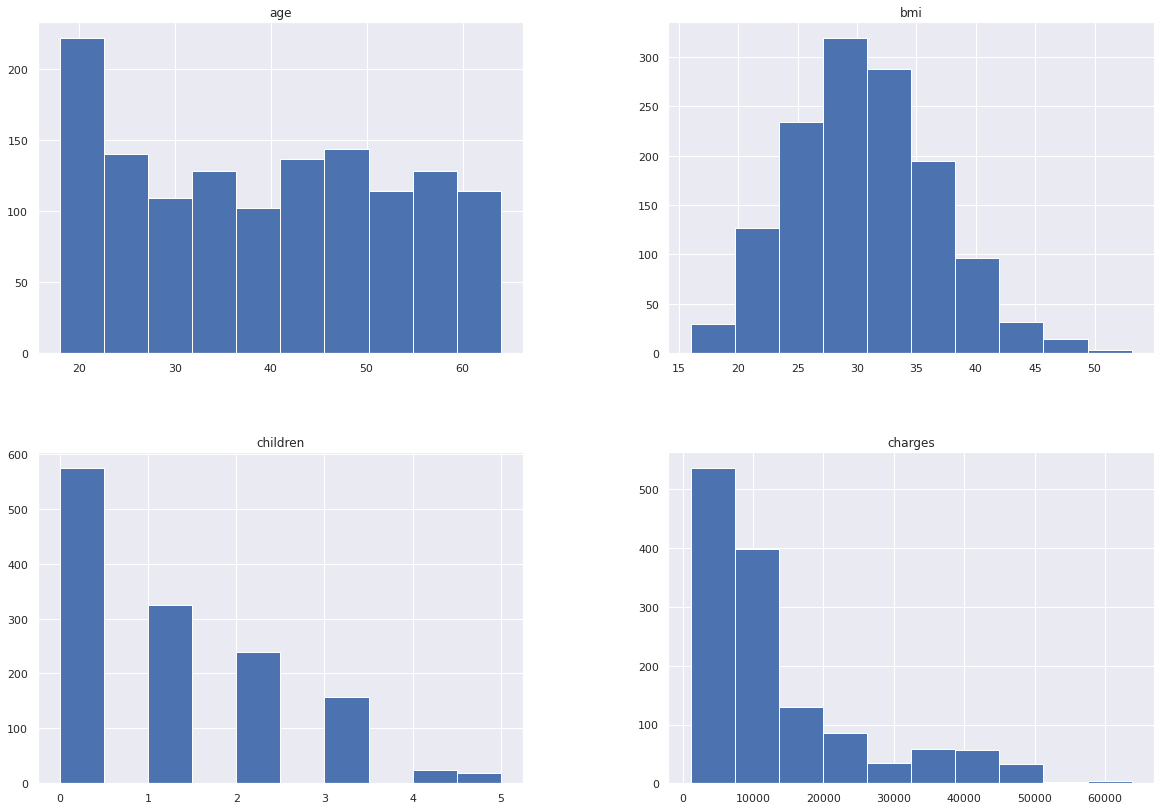

In [ ]:
df.hist();

In [ ]:
print('\n Distribution of Age\n'.center(70,"*"))
print('Mean of Age:',df['age'].mean())
print('Median of Age:',df['age'].median())
print('Mode of Age:',df['age'].mode())

************************
 Distribution of Age
************************
Mean of Age: 39.20702541106129
Median of Age: 39.0
Mode of Age: 0    18
dtype: int64


In [ ]:
print('\n Distribution of Charges\n'.center(80,"*"))
print('Mean of charges:',df['charges'].mean())
print('Median of charges:',df['charges'].median())
print('Mode of charges:',df['charges'].mode())

***************************
 Distribution of Charges
***************************
Mean of charges: 13270.422265141257
Median of charges: 9382.033
Mode of charges: 0    1639.5631
dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



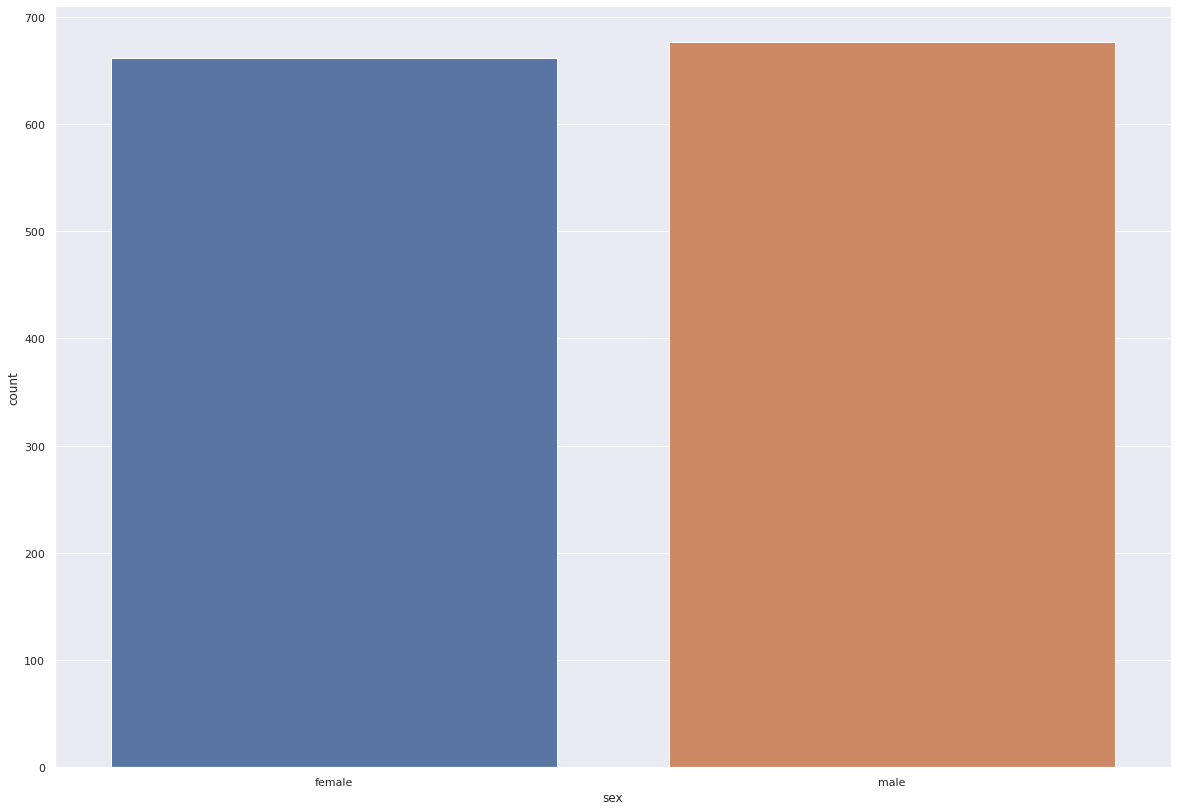

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



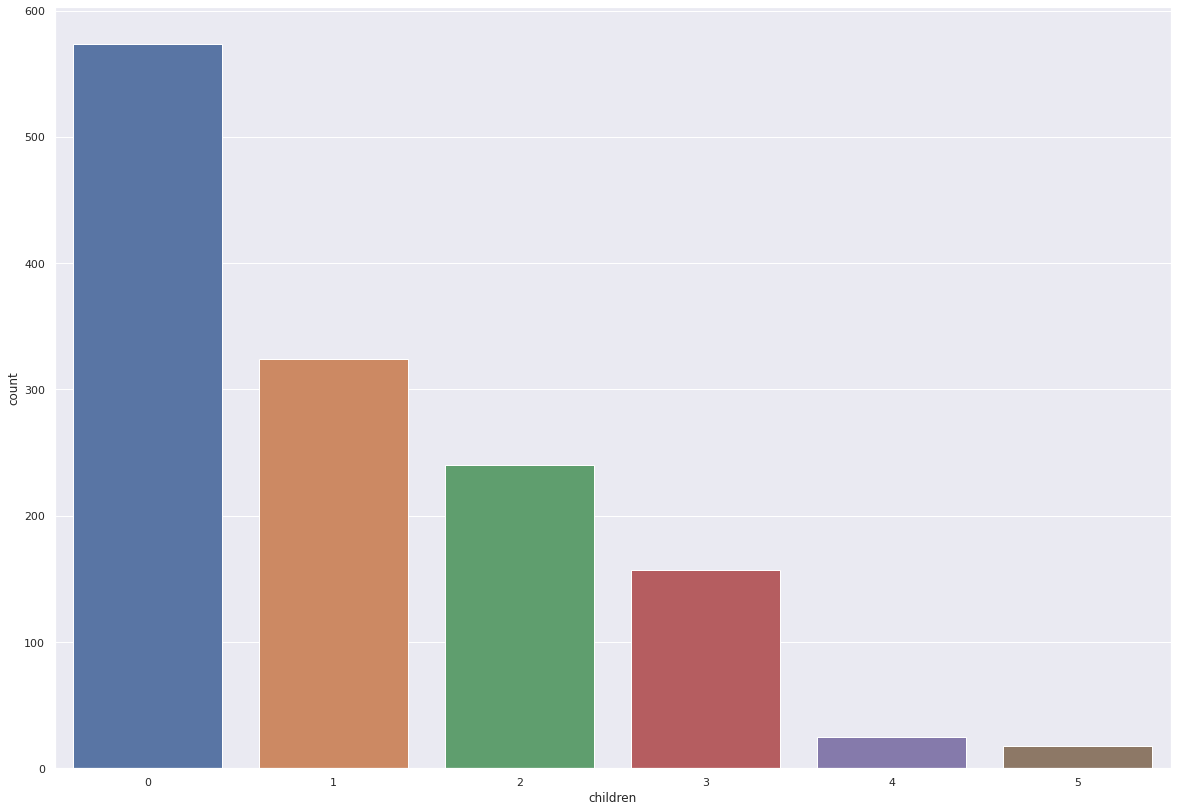

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



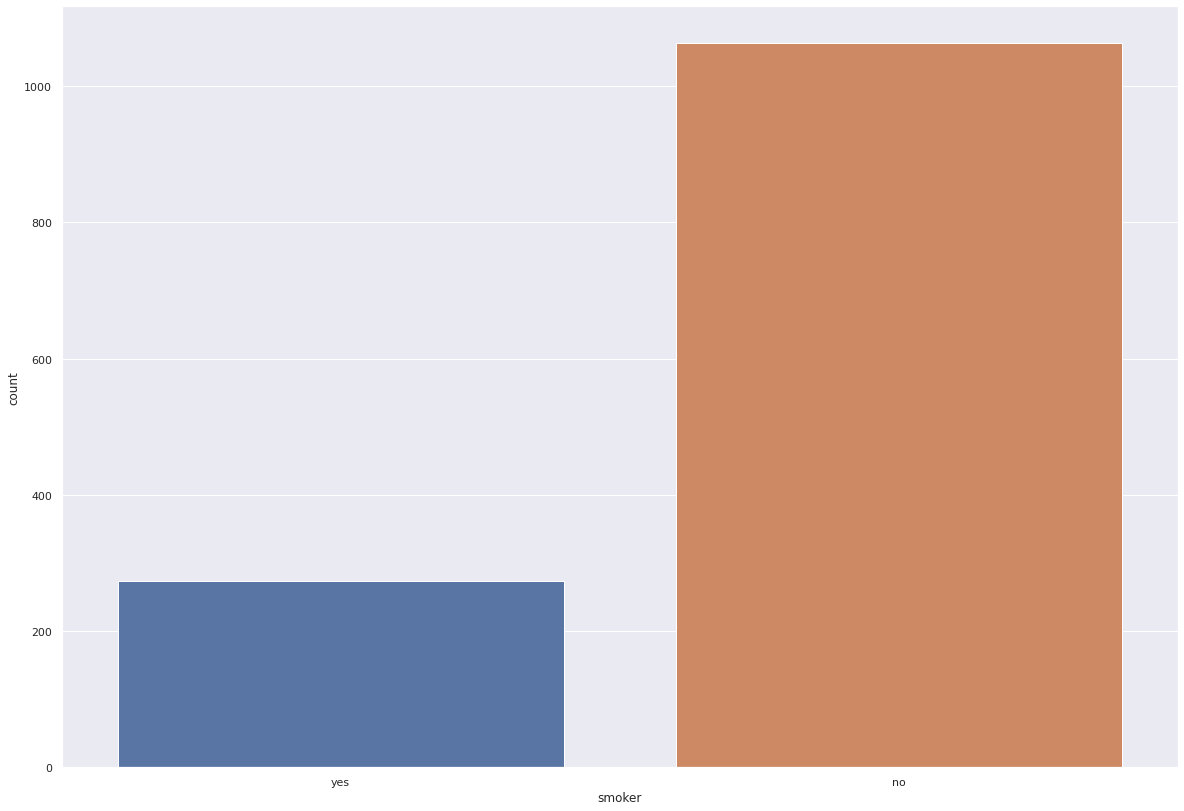

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



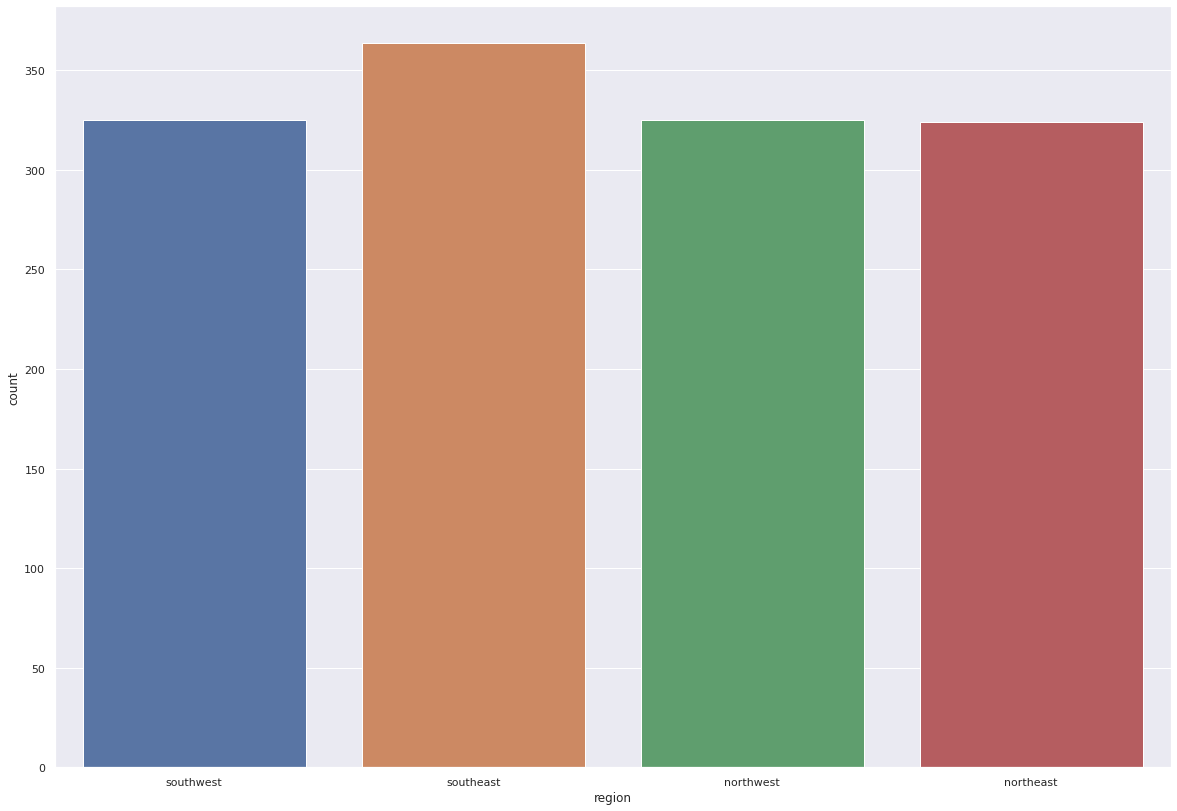

In [ ]:
# Distibution of the column 'sex', 'children', 'smoker', 'region'
sns.countplot(df['sex'])    
plt.show() 
sns.countplot(df['children'])
plt.show() 
sns.countplot(df['smoker'])  
plt.show() 
sns.countplot(df['region'])
plt.show() 

##Smoker & Sex

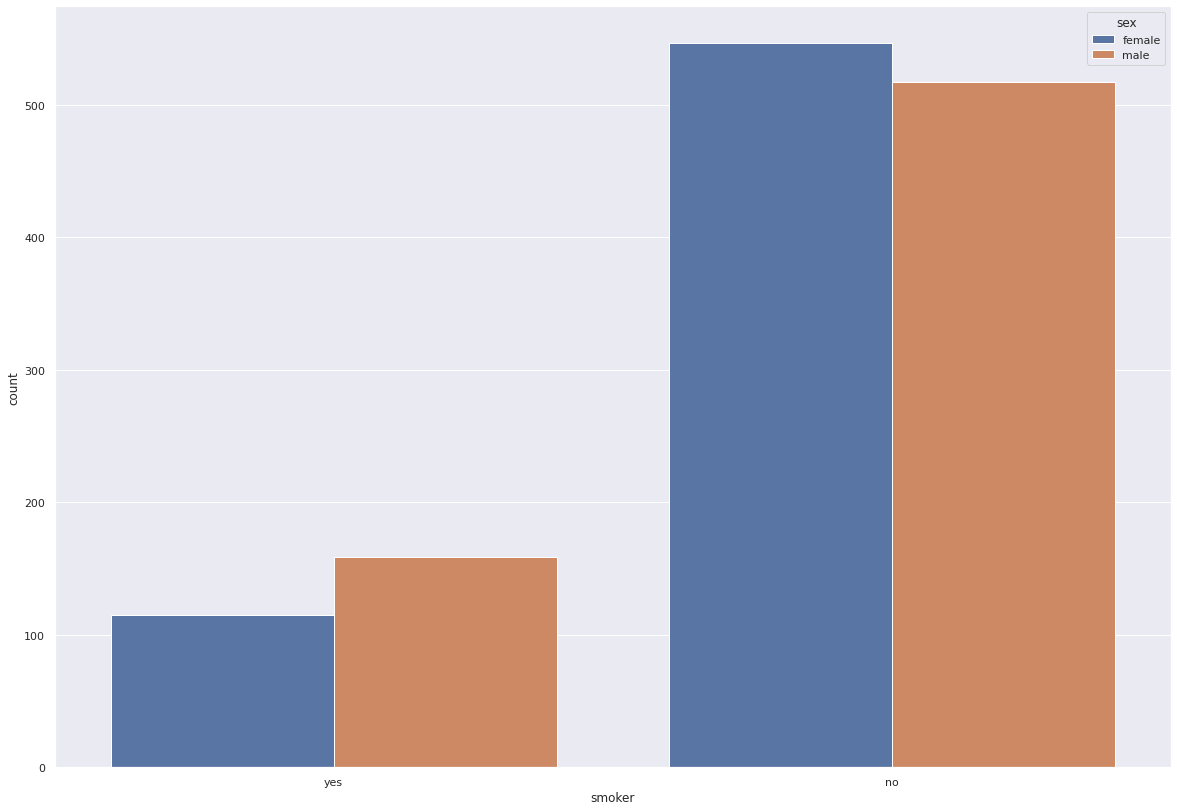

In [ ]:
# count plot on two categorical variable
sns.countplot(x ='smoker', hue = "sex", data = df)
plt.show()

In [ ]:
df.groupby("sex")["smoker"].value_counts(normalize=True)
# ratio of smoker males is higher than females

sex     smoker
female  no        0.826284
        yes       0.173716
male    no        0.764793
        yes       0.235207
Name: smoker, dtype: float64

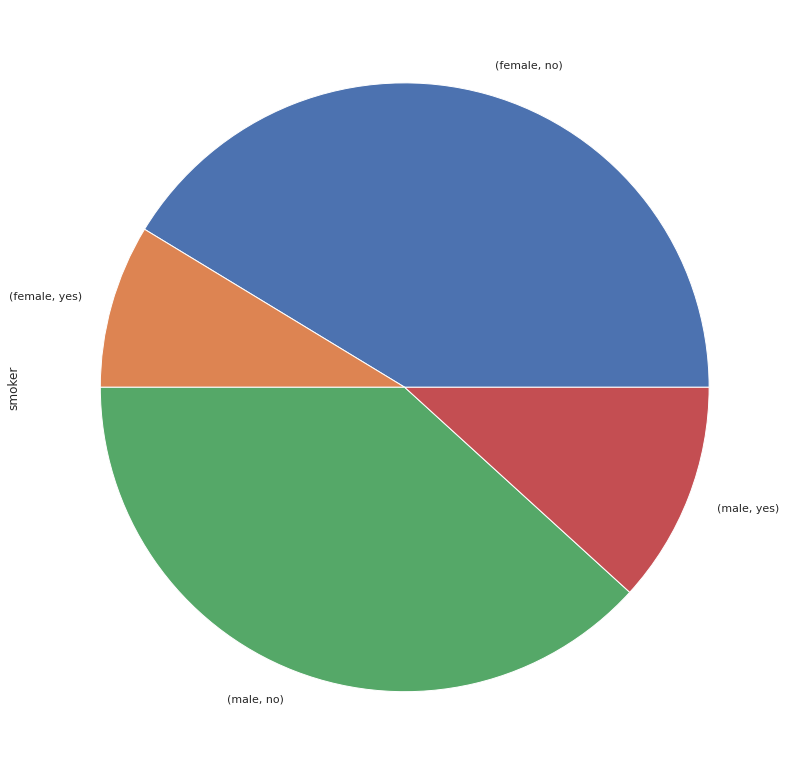

In [ ]:
df.groupby("sex")["smoker"].value_counts(normalize=True).plot.pie();

##smoker & charges


tstat value is: 46.66492117272371
pvalue value is: 8.271435842179102e-283 

With a p-value of 0.0 the difference is important. Reject the null Hypothesis.


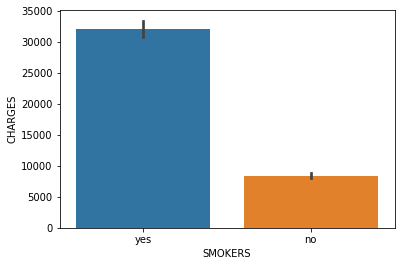

In [ ]:
import scipy.stats as stats 
from scipy.stats import f_oneway
from statsmodels.stats.proportion import proportions_ztest

issmoker = df[df['smoker'] == 'yes']['charges'] 
nonsmoker = df[df['smoker'] == 'no']['charges'] 
t_stat, pvalue = stats.ttest_ind(issmoker,nonsmoker, axis = 0)
print('\ntstat value is:',t_stat)
print('pvalue value is:',pvalue,'\n')
if pvalue < 0.05:
    print(f'With a p-value of {round(pvalue,4)} the difference is important. Reject the null Hypothesis.')
else:
    print(f'With a p-value of {round(pvalue,4)} the difference is not important. Fail to reject the null Hypothesis')

sns.barplot(data=df, x='smoker',y='charges')
plt.xlabel('SMOKERS')
plt.ylabel('CHARGES')
plt.show()

In [ ]:
df.groupby("smoker")["charges"].mean()

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

##“smoker” (Sigara tüketen) ile “region”(Bölge) arasındaki ilişkiyi inceleyiniz.

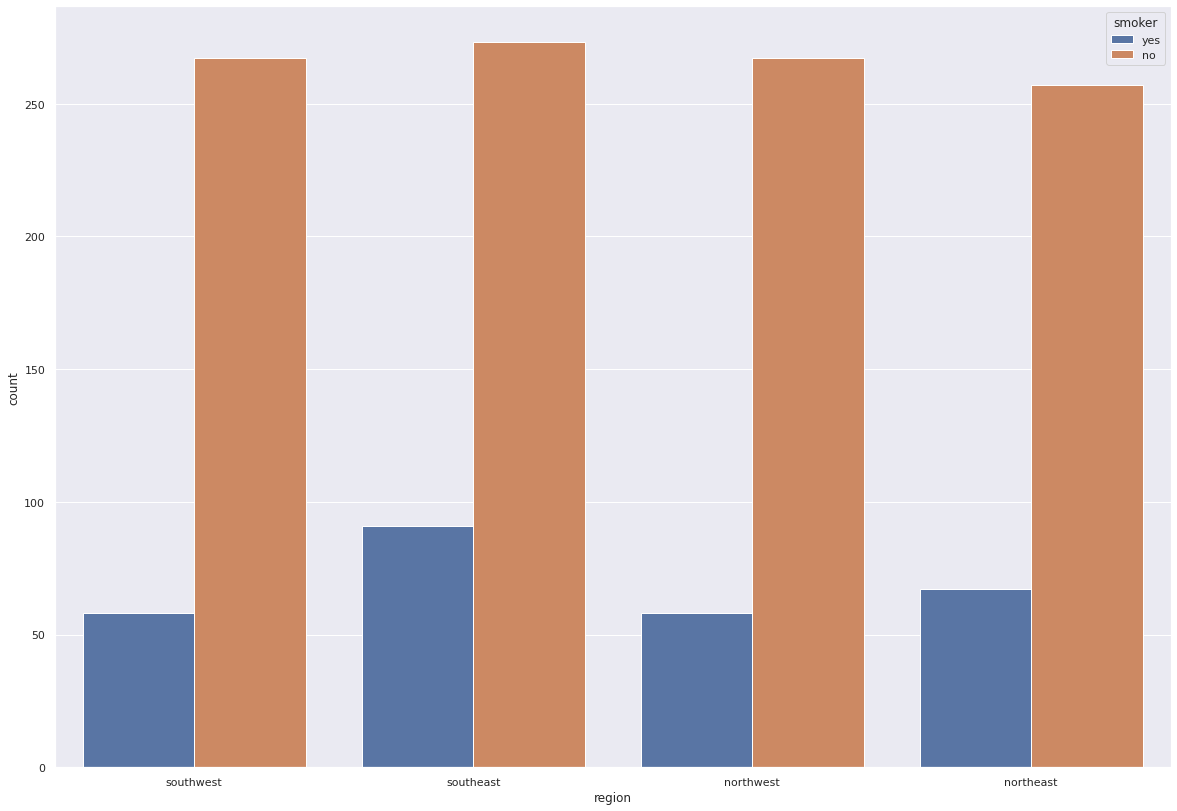

In [ ]:
# count plot on two categorical variable
sns.countplot(x ='region', hue='smoker', data = df)
 
# Show the plot
plt.show()
# The highest smoking region is  southeast
# The lowest smoking region is  southwest

## “bmi” ile “sex” arasındaki ilişkiyi inceleyiniz.


tstat value is: 1.696752635752224
pvalue value is: 0.08997637178984932 

With a p-value of 0.09 the difference is not significant. So, We fail to reject the null Hypothesis
Thus, Bmi not differs


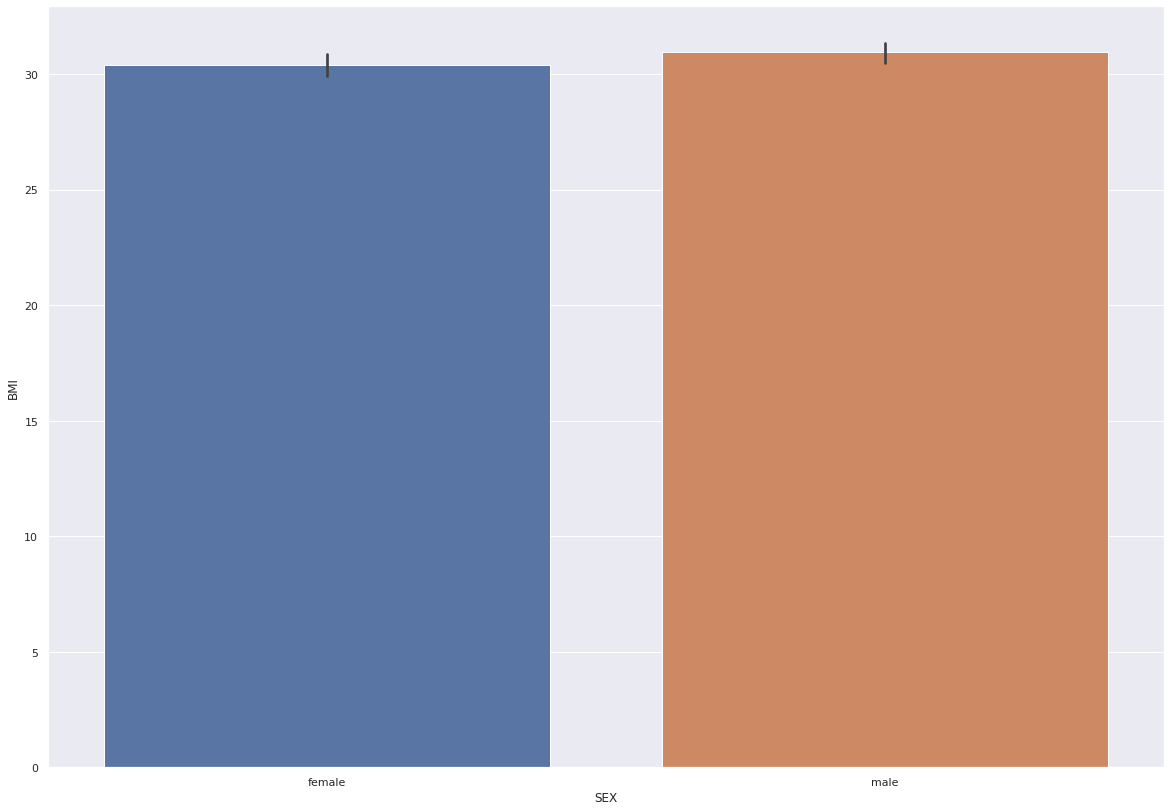

In [ ]:
bmi_males = df[df['sex'] == 'male']['bmi']
bmi_females = df[df['sex'] == 'female']['bmi'] 
t_stat, pval = stats.ttest_ind(bmi_males,bmi_females, axis = 0)
print('\ntstat value is:',t_stat)
print('pvalue value is:',pval,'\n')
if pval < 0.05:
    print(f'With a p-value of {round(pval,4)} the difference is significant. So, we reject the null Hypothesis')
    print('Thus,Bmi of males differ significantly from that of females')
else:
    print(f'With a p-value of {round(pval,4)} the difference is not significant. So, We fail to reject the null Hypothesis')
    print('Thus, Bmi not differs')

sns.barplot(data=df,x='sex',y='bmi')
plt.xlabel('SEX')
plt.ylabel('BMI')
plt.show()

##En çok “children”’a sahip “region”’ı bulunuz (#diğer outputları bozmamak için çalıştırmadım ama çalışıyo :) -zey)

In [ ]:
northwest = 0
northeast = 0
southwest = 0
southeast = 0

for row in df.index:
  reg = df['region'][row]
  child = df['children'][row]
  if reg == 'northwest':
    northwest = northwest + int(child)
  elif reg == 'northeast':
    northeast = northeast + int(child)
  elif reg == 'southwest':
    southwest = southwest + int(child)
  elif reg == 'southeast':
    southeast = southeast + int(child)

print('There are %d children from southwest' % (southwest))
print('There are %d children from southeast' % (southeast))
print('There are %d children from northwest' % (northwest))
print('There are %d children from northeast' % (northeast))

There are 371 children from southwest
There are 382 children from southeast
There are 373 children from northwest
There are 339 children from northeast


In [ ]:
 df.groupby("region")["children"].value_counts()

region     children
northeast  0           147
           1            77
           2            51
           3            39
           4             7
           5             3
northwest  0           132
           1            74
           2            66
           3            46
           4             6
           5             1
southeast  0           157
           1            95
           2            66
           3            35
           5             6
           4             5
southwest  0           138
           1            78
           2            57
           3            37
           5             8
           4             7
Name: children, dtype: int64

##“Age” ile “bmi” arasındaki ilişkiyi inceleyiniz.

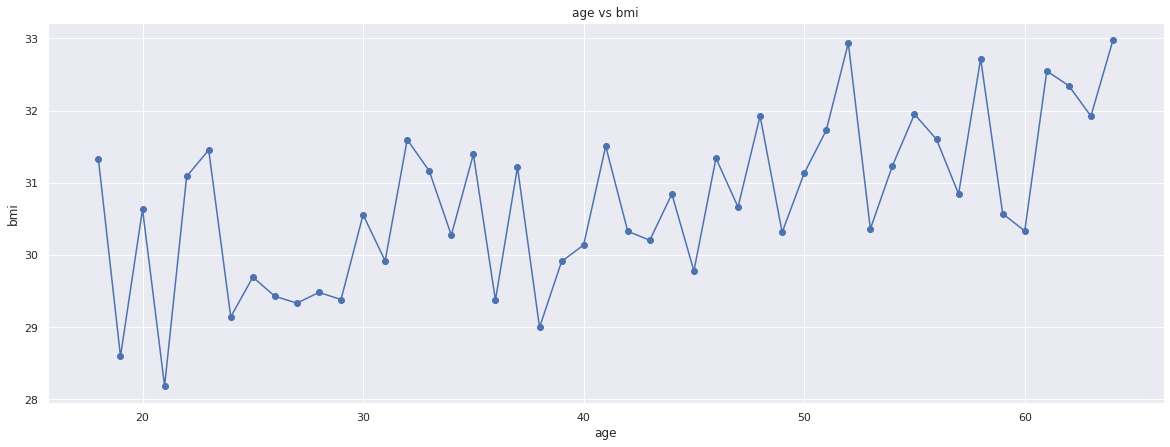

In [ ]:
plt.figure(figsize=(20,7))
df.groupby('age')['bmi'].mean().plot(linewidth = 1.5, marker ='o')
plt.xlabel('age')
plt.ylabel('bmi')
plt.title("age vs bmi");

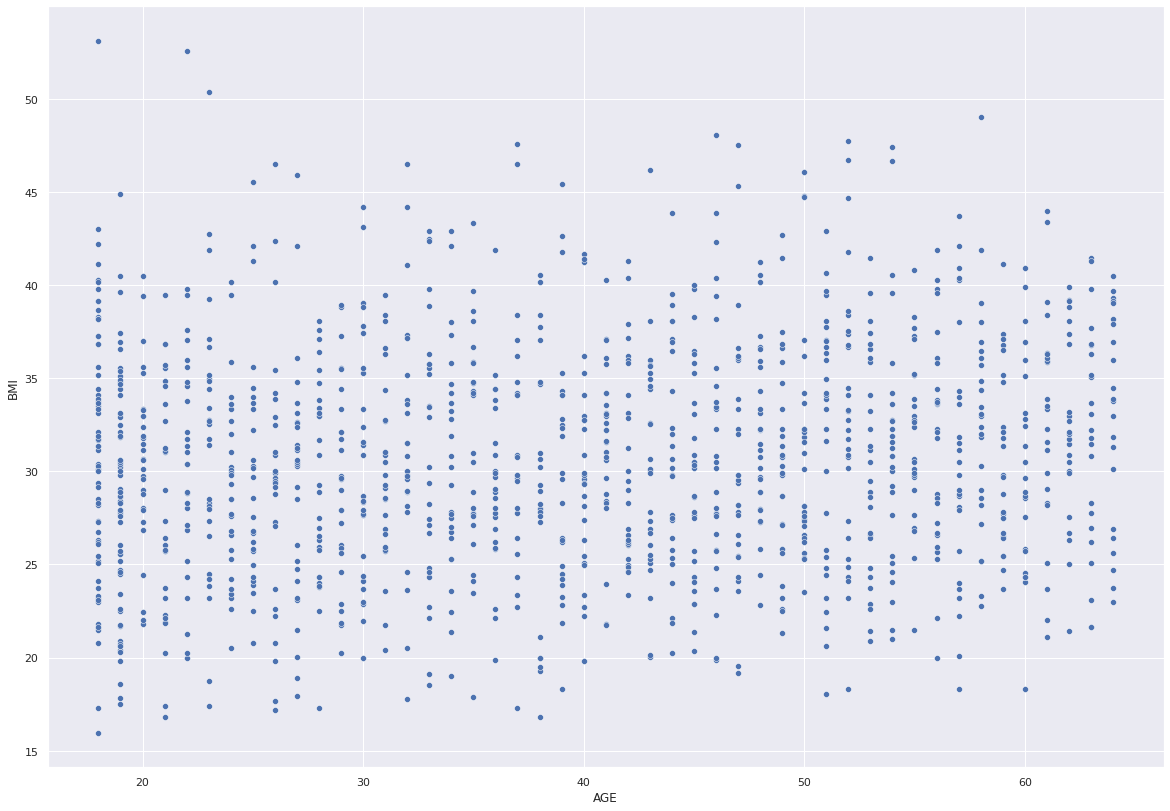

In [ ]:
sns.scatterplot(data=df,x='age',y='bmi')
plt.xlabel('AGE')
plt.ylabel('BMI')
plt.show()

In [ ]:
df["age"].corr(df["bmi"])

0.1092718815485352

## “bmi” ile “children” arasındaki ilişkiyi inceleyiniz.

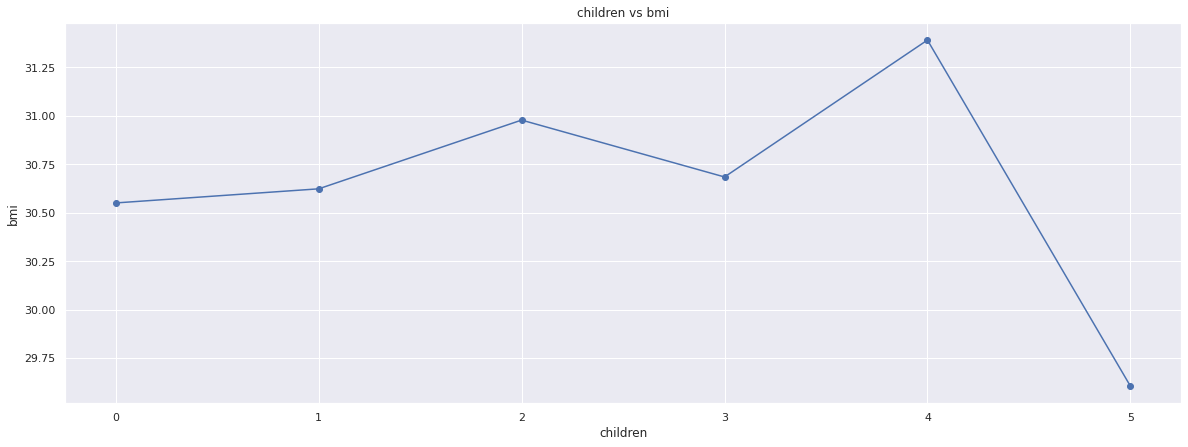

In [ ]:
plt.figure(figsize=(20,7))
df.groupby('children')['bmi'].mean().plot(linewidth = 1.5, marker ='o')
plt.xlabel('children')
plt.ylabel('bmi')
plt.title("children vs bmi");

## “bmi” değişkeninde outlier var mıdır? İnceleyiniz. (#outputları bozmamak için çalıştırmadım ama çalışıyo :) -zey


In [ ]:
#box plot kullanarak outlier olup olmadığını görselleştirmek
fig = px.box(df, y='bmi')

fig.show()

In [ ]:
#istatistik analiz ile outlierların sayısını, minimumunu ve maximumunu bulmak
def outlier_finder(df):

   a=df.quantile(0.25) #25th percentile of the dataset
   b=df.quantile(0.75) #75th percentile of the dataset

   iqr = b-a #iqr is the interquartile range

   outlier = df[((df<(a-1.5*iqr)) | (df>(b+1.5*iqr)))]

   return outlier

outliers = outlier_finder(df['bmi']) #bmi değişkenininkileri arıyoruz

print("Outlierların sayısı: "+ str(len(outliers)))

print("Maximum değeri: "+ str(outliers.max()))

print("Minimum değeri: "+ str(outliers.min()))

Outlierların sayısı: 9
Maximum değeri: 53.13
Minimum değeri: 47.41


## “bmi” ile “charges” arasındaki ilişkiyi inceleyiniz.

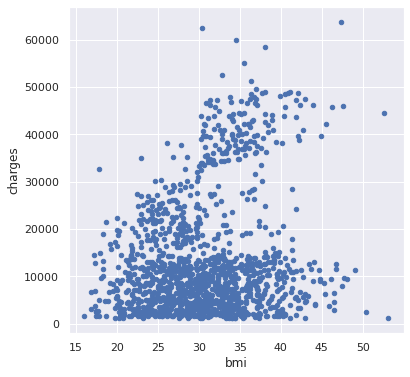

In [ ]:
df.plot(kind='scatter', x='bmi', y='charges', figsize=(6,6));

## “region”, “smoker” ve “bmi” arasındaki ilişkiyi bar plot kullanarak inceleyiniz. (#outputları bozmamak için çalıştırmadım ama çalışıyo :) -zey

In [ ]:
reg_smo_bmi = df[["region", "smoker", "bmi"]] #kullanılacak columnları ayırmak
reg_smo_bmi.head()


,region,smoker,bmi
0,southwest,yes,27.900
1,southeast,no,33.770
2,southeast,no,33.000
3,northwest,no,22.705
4,northwest,no,28.880


In [ ]:
#catagorical value ları numeric olacak şekilde columnlara dağıtmak
transformed = reg_smo_bmi.copy()
transformed = pd.get_dummies(transformed, columns=['region'], prefix = ['region'])
transformed = pd.get_dummies(transformed, columns=['smoker'], prefix = ['smoker'])

transformed.head() 

,bmi,region_northeast,region_northwest,region_southeast,region_southwest,smoker_no,smoker_yes
0,27.900,0,0,0,1,0,1
1,33.770,0,0,1,0,1,0
2,33.000,0,0,1,0,1,0
3,22.705,0,1,0,0,1,0
4,28.880,0,1,0,0,1,0


In [ ]:
transformed.corr() #correlationlara genel bakış

,bmi,region_northeast,region_northwest,region_southeast,region_southwest,smoker_no,smoker_yes
bmi,1.000000,-0.138156,-0.135996,0.270025,-0.006205,-0.003750,0.003750
region_northeast,-0.138156,1.000000,-0.320177,-0.345561,-0.320177,-0.002811,0.002811
region_northwest,-0.135996,-0.320177,1.000000,-0.346265,-0.320829,0.036945,-0.036945
region_southeast,0.270025,-0.345561,-0.346265,1.000000,-0.346265,-0.068498,0.068498
region_southwest,-0.006205,-0.320177,-0.320829,-0.346265,1.000000,0.036945,-0.036945
smoker_no,-0.003750,-0.002811,0.036945,-0.068498,0.036945,1.000000,-1.000000
smoker_yes,0.003750,0.002811,-0.036945,0.068498,-0.036945,-1.000000,1.000000


In [ ]:
def redundant(df): #tekrarlanan ikilileri listelemek (bmi,bmi) gibi
    dropper = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            dropper.add((cols[i], cols[j]))
    return dropper
  
c = transformed.corr().unstack() 
labels = redundant(transformed) #droplanacak labelleri fonksiyonu kullanarak değişkene vermek
c = c.drop(labels=labels).sort_values(ascending=False) #gereksiz labellerı droplamak
manuel = {("region_southeast", "region_southwest"), ("smoker_no", "smoker_yes"), ("region_northwest", "region_southeast"), ("region_northeast", "region_southeast"), ("region_northwest", "region_southwest"), ("region_northeast", "region_southwest"), ("region_northeast", "region_northwest")}
c = c.drop(labels=manuel).sort_values(ascending=False) #catagoricalları numerik yaptığımız için oluşan gereksiz labelları droplamak

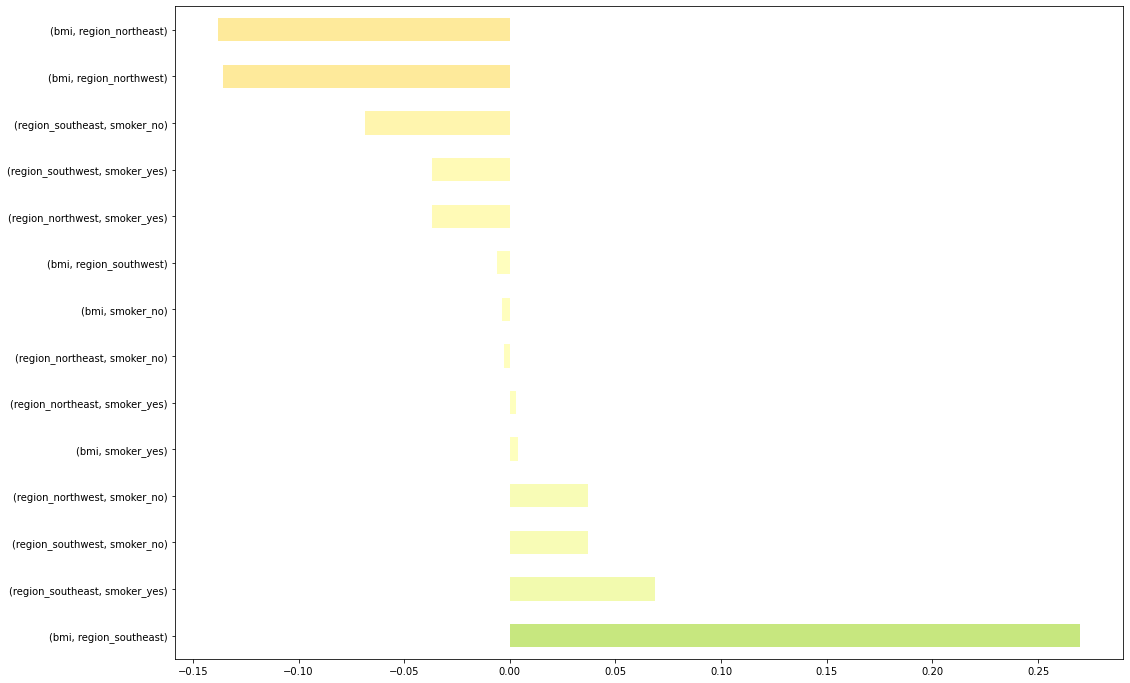

In [ ]:
#son olarak correlationları bar plot olarak görselleştirmek
fig, ax = plt.subplots(figsize =(17,12))

norm = TwoSlopeNorm(vmin=-1, vcenter =0, vmax=1)
colors = [plt.cm.RdYlGn(norm(a)) for a in c.values]

c.plot.barh(color=colors);

# 4. Veri Ön İşleme Yapılması

In [ ]:
X = df[['age', 'sex', 'children',
        'smoker', 'region', 'bmi']]

y = df['charges']

In [ ]:
from sklearn.model_selection import train_test_split

# 20% test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((1070, 6), (268, 6))

In [ ]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')

# Fit and transform on the training set:
categorical_variables = enc.fit_transform(X_train[['region']]).toarray()

# Transform to dataframe:
categorical_variables = pd.DataFrame(categorical_variables, columns=enc.get_feature_names_out())
#categorical_variables.head(5)

In [ ]:
# Merge one-hot-encoded variables to the training set:
X_train = X_train.merge(categorical_variables,
                         how='left',
                         right_index=True,
                         left_index=True)

# remove the original columns:
X_train = X_train.drop(columns=['region'])

In [ ]:
print(X_train)

      age     sex  children smoker     bmi  region_northeast  \
560    46  female         2     no  19.950               0.0   
1285   47  female         0     no  24.320               NaN   
1142   52  female         0     no  24.860               NaN   
969    39  female         5     no  34.320               1.0   
486    54  female         3     no  21.470               0.0   
...   ...     ...       ...    ...     ...               ...   
1095   18  female         4     no  31.350               NaN   
1130   39  female         5     no  23.870               NaN   
1294   58    male         0     no  25.175               NaN   
860    37  female         2    yes  47.600               0.0   
1126   55    male         0     no  29.900               NaN   

      region_northwest  region_southeast  region_southwest  
560                1.0               0.0               0.0  
1285               NaN               NaN               NaN  
1142               NaN               NaN        

In [ ]:
X_train.sex.unique()

array(['female', 'male'], dtype=object)

In [ ]:
X_train.sex = X_train.sex.apply(lambda x: 1 if x=='female' else 0)
X_test.sex = X_test.sex.apply(lambda x: 1 if x=='female' else 0)

In [ ]:
print(X_train)

      age  sex  children smoker     bmi  region_northeast  region_northwest  \
560    46    1         2     no  19.950               0.0               1.0   
1285   47    1         0     no  24.320               NaN               NaN   
1142   52    1         0     no  24.860               NaN               NaN   
969    39    1         5     no  34.320               1.0               0.0   
486    54    1         3     no  21.470               0.0               0.0   
...   ...  ...       ...    ...     ...               ...               ...   
1095   18    1         4     no  31.350               NaN               NaN   
1130   39    1         5     no  23.870               NaN               NaN   
1294   58    0         0     no  25.175               NaN               NaN   
860    37    1         2    yes  47.600               0.0               0.0   
1126   55    0         0     no  29.900               NaN               NaN   

      region_southeast  region_southwest  
560     

In [ ]:
X_train.smoker.unique()

array(['no', 'yes'], dtype=object)

In [ ]:
X_train.smoker = X_train.smoker.apply(lambda x: 1 if x=='yes' else 0)
X_test.smoker = X_test.smoker.apply(lambda x: 1 if x=='yes' else 0)

In [ ]:
X_train = X_train.fillna(0)

In [ ]:
X_train

,age,sex,children,smoker,bmi,region_northeast,region_northwest,region_southeast,region_southwest
560,46,1,2,0,19.950,0.0,1.0,0.0,0.0
1285,47,1,0,0,24.320,0.0,0.0,0.0,0.0
1142,52,1,0,0,24.860,0.0,0.0,0.0,0.0
969,39,1,5,0,34.320,1.0,0.0,0.0,0.0
486,54,1,3,0,21.470,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
1095,18,1,4,0,31.350,0.0,0.0,0.0,0.0
1130,39,1,5,0,23.870,0.0,0.0,0.0,0.0
1294,58,0,0,0,25.175,0.0,0.0,0.0,0.0
860,37,1,2,1,47.600,0.0,0.0,0.0,1.0


In [ ]:
# Transform the test set:
categorical_variables = enc.transform(X_test[['region']]).toarray()

# Transform to dataframe:
categorical_variables = pd.DataFrame(categorical_variables, columns=enc.get_feature_names_out())

# Merge one-hot-encoded variables to the training set:
X_test = X_test.reset_index(drop=True)
X_test = X_test.merge(categorical_variables,
                        how='left',
                        right_index=True,
                        left_index=True)

# remove the original columns:
X_test = X_test.drop(columns=['region'])

In [ ]:
X_test.dropna()

,age,sex,children,smoker,bmi,region_northeast,region_northwest,region_southeast,region_southwest
0,45,1,2,0,25.175,1.0,0.0,0.0,0.0
1,36,1,0,0,30.020,0.0,1.0,0.0,0.0
2,64,1,0,1,26.885,0.0,1.0,0.0,0.0
3,46,0,3,0,25.745,0.0,1.0,0.0,0.0
4,19,0,0,1,31.920,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
263,63,0,0,1,35.090,0.0,0.0,1.0,0.0
264,58,1,0,0,27.170,0.0,1.0,0.0,0.0
265,38,0,1,0,28.025,1.0,0.0,0.0,0.0
266,54,1,0,1,47.410,0.0,0.0,1.0,0.0


In [ ]:
# MODEL
#PYCARET

#!pip3 install pycaret

#!pip install jinja2

#!pip install markupsafe==2.0.1

In [ ]:

#from pycaret.regression import *

In [ ]:
#exp_name=setup(data=df,target="charges")

,Description,Value
0,session_id,7869
1,Target,charges
2,Original Data,"(1338, 7)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(936, 14)"


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='charges',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluster_all', 'passthrough'),
              

In [ ]:
#best_model=compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2777.5015,2.381117e+07,4830.8753,0.8320,0.4616,0.3379,0.103
lightgbm,Light Gradient Boosting Machine,3063.1184,2.568141e+07,5030.1276,0.8170,0.5325,0.3817,0.133
rf,Random Forest Regressor,2981.8600,2.622983e+07,5097.5438,0.8109,0.4907,0.3611,0.580
ada,AdaBoost Regressor,4372.0376,2.987881e+07,5458.5895,0.7822,0.6333,0.7379,0.044
et,Extra Trees Regressor,2926.6996,3.019959e+07,5454.2579,0.7789,0.5103,0.3524,0.531
llar,Lasso Least Angle Regression,4295.1188,3.920677e+07,6229.5995,0.7217,0.5881,0.4428,0.017
ridge,Ridge Regression,4316.0301,3.927173e+07,6235.0177,0.7212,0.5964,0.4454,0.015
lasso,Lasso Regression,4302.6983,3.927017e+07,6235.7510,0.7211,0.6063,0.4426,0.016
br,Bayesian Ridge,4313.5421,3.927133e+07,6235.1782,0.7211,0.5982,0.4448,0.017
lr,Linear Regression,4303.4502,3.927658e+07,6236.3832,0.7210,0.6107,0.4426,0.363


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 2
INFO:logs:GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=7869, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


# 5. Model Seçme

● Birkaç regresyon modeli seçiniz bunları ön işleme yapılan veri ile eğitiniz
● Seçilen modellerin performanslarını çapraz doğrulama kullanarak inceleyiniz.
● En iyi performans gösteren modeli seçiniz

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbr_model = GradientBoostingRegressor()
gbr_model.fit(X_train, y_train)
gbc_pred = gbr_model.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, gbc_pred)
mse = mean_squared_error(y_test, gbc_pred)
r2 = r2_score(y_test, gbc_pred)
print(f"MAE: {mae}\nMSE: {mse}\nR2_SCORE: {r2} ")

MAE: 2422.4198245449634
MSE: 18783502.04908585
R2_SCORE: 0.879010270366807 


In [ ]:
gbc_comparison = pd.DataFrame({"Actual Values": y_test,"Predictions": gbc_pred})
gbc_comparison.head()

,Actual Values,Predictions
764,9095.06825,9805.380452
887,5272.17580,6068.074945
890,29330.98315,28179.024926
1293,9301.89355,9117.318826
259,33750.29180,34273.663965


In [ ]:

import lightgbm as lgb
from lightgbm import LGBMRegressor
lgb_model = LGBMRegressor()
lgb_model.fit(X_train, y_train)
lgb_pred = lgb_model.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, lgb_pred)
mse = mean_squared_error(y_test, lgb_pred)
r2 = r2_score(y_test, lgb_pred)
print(f"MAE: {mae}\nMSE: {mse}\nR2_SCORE: {r2} ")

In [ ]:
lgb_comparison = pd.DataFrame({"Actual Values": y_test,"Predictions": lgb_pred})
lgb_comparison.head()

,Actual Values,Predictions
764,9095.06825,9652.511233
887,5272.17580,4269.392844
890,29330.98315,28779.213929
1293,9301.89355,9486.123142
259,33750.29180,32473.148233


In [ ]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=44)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [ ]:
print(predictions)

[ 8027.968    4399.731   28950.4692  10115.00885 33732.6867  11326.71487
  1737.376   13822.803    3353.4703  10736.87075 19361.9988   7729.64575
  4040.55825 45702.02235 48173.361   48885.13561  9304.7019  41676.0811
  8026.6666  21348.706    4877.98105  8410.04685  1744.465    1633.9618
 25656.57526 10338.9316  13635.6379   3987.926    9225.2564   1712.227
  7243.8136  11840.77505  2134.9015   4906.40965  3392.3652   9704.66805
  2709.24395  7727.2532  22218.1149  37742.5757  18838.70366 27724.28875
 11763.0009  12142.5786   5584.3057  13224.693    3925.7582  22395.74424
 40273.6455  24915.04626 13462.52     1720.3537   6610.1097   1708.0014
 10435.06525  9630.397    2497.0383  58571.07448 12430.95335  9504.3103
 14043.4767   6360.9936  31620.00106  8252.2843  10797.3362   4237.12655
 21472.4788  12475.3513   3378.91     1633.9618   5488.262    8823.98575
 20878.78443 23563.01618  8023.13545  4402.233    4058.71245 11070.535
  3981.9768   8615.3      1261.442   26109.32905  4934.705 

In [ ]:

model.score(X_train,y_train)

0.9994940317409223

In [ ]:

model.score(X_test,y_test)

0.6661701041643577

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


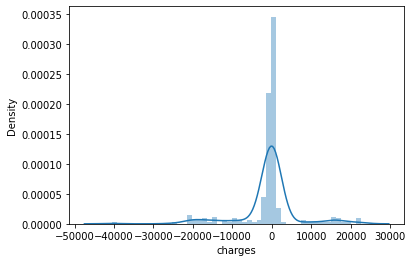

In [ ]:
sns.distplot(y_test-predictions);

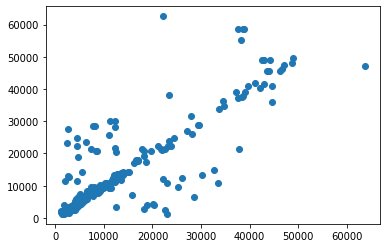

In [ ]:
plt.scatter(y_test,predictions);

In [ ]:
# without hyperparameter tuning 
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 3383.060632242537
MSE: 51826667.86251434
RMSE: 7199.074097584657


In [ ]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
 
# fit the regressor with x and y data
regressor.fit(X_train, y_train) 

RandomForestRegressor(random_state=0)

In [ ]:
y_pred = regressor.predict(X_test)  # test the output by changing values
print(y_pred)

[ 9059.1115837   5470.6634615  27946.9068395   9477.8595865
 34625.0457762   9855.3709396   1957.9637415  14142.3712955
  6796.834005   10754.6323984  19692.781474    7155.3528129
  6940.1681121  45718.283703   48602.1826324  44935.1180951
 11384.8773806  42827.6457612  11367.1686527  26847.3121813
  7694.6221661  10948.7722212   2415.9358444   2067.2610505
 15152.5499351  12931.7444138  14172.0121164   5703.833958
  9789.7294642   3711.7232549   8196.7006118  12323.7784184
  3955.7210123   5224.9387175   3771.2706989   8878.6734215
  4112.4638541   8256.0573397  24052.9444897  39512.5068204
 13187.2235077   5380.8833538  12961.8007927  13778.787959
  6716.9001699  13552.8652843  12033.2003953  12049.1336588
 42065.1561444   7488.007337   14085.0172706   3495.8368249
  7228.5982975   2798.8839535  11602.3102902   9916.6369735
  3862.2922801  44665.9070618  13290.7441589  15310.0352124
 14194.6288228   6166.3187596  20669.1129775   7913.8890169
 14178.7093749   5816.7351311  19535.20816

In [ ]:
# without hyperparameter tuning (Random Forest)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test,rf_pred))
print('MSE:', metrics.mean_squared_error(y_test, rf_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rf_pred)))

MAE: 2741.4071533592355
MSE: 21494497.141060155
RMSE: 4636.215821233968


Extra Trees Regressor

In [ ]:
from sklearn import ensemble
ext_model = ensemble.ExtraTreesRegressor(n_estimators=5, max_depth=10, max_features=0.3, n_jobs=-1, random_state=0)
ext_model.fit(X_train,y_train)

ExtraTreesRegressor(max_depth=10, max_features=0.3, n_estimators=5, n_jobs=-1,
                    random_state=0)

In [ ]:
importances = ext_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in ext_model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1][:20]

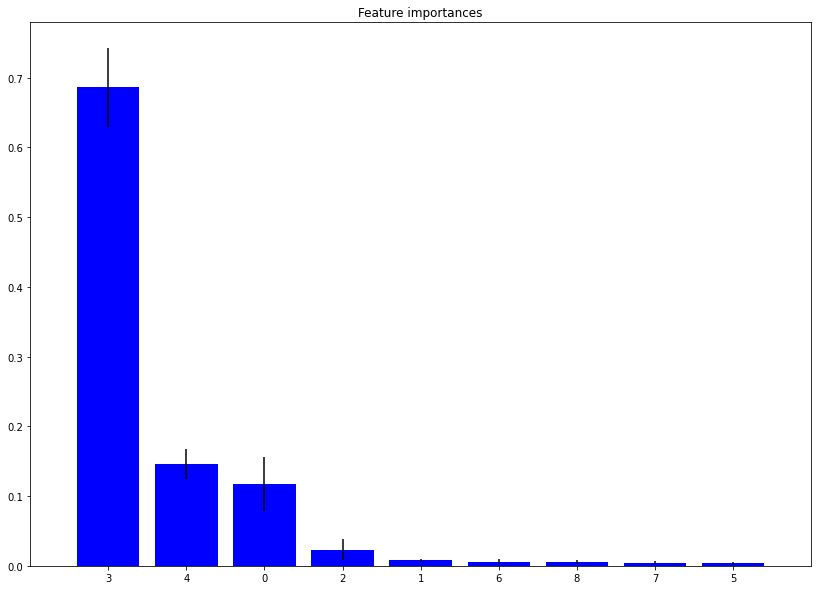

In [ ]:
plt.figure(figsize=(14,10))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices],
       color="b", yerr=std[indices], align="center")
plt.xticks(range(len(indices)), indices)
plt.xlim([-1, len(indices)])
plt.show()

In [ ]:
from sklearn import model_selection
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
ex_model = ensemble.ExtraTreesRegressor(n_estimators=5, max_depth=10, max_features=0.3, n_jobs=-1, random_state=0)
results = model_selection.cross_val_score(ext_model, X_train, y_train, cv=kfold)
print(results.mean())

0.7737549604793037


In [ ]:
ex_model.fit(X_train, y_train)
ex_pred = ex_model.predict(X_test)

##Linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
model_lr.fit(X_train,y_train)


LinearRegression()

In [ ]:
predictions = model_lr.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
from numpy import sqrt

In [ ]:
rmse = sqrt(mean_squared_error(y_test, predictions))
rmse

5886.713934525814

In [ ]:
comparison = pd.DataFrame({"Actual Values": y_test,"Predictions": predictions})

In [ ]:
comparison.head()

,Actual Values,Predictions
764,9095.06825,8232.164167
887,5272.17580,6881.567070
890,29330.98315,36792.254005
1293,9301.89355,9343.377958
259,33750.29180,26828.732822


In [ ]:
comparison.tail()

,Actual Values,Predictions
109,47055.53210,39908.807954
575,12222.89830,11633.750014
535,6067.12675,6953.499802
543,63770.42801,41601.091150
846,9872.70100,11898.493587


Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score,KFold
kf=KFold(n_splits=5)
score=cross_val_score(model,X_train,y_train,cv=kf)
print("\nDecision Tree Regression için: ")
print("Cross Validation Score: {}".format(score))
print("Ortalama Cross Validation score :{}".format(score.mean()))

score=cross_val_score(regressor,X_train,y_train,cv=kf)
print("\nRandom Forest Regression için: ")
print("Cross Validation Score: {}".format(score))
print("Ortalama Cross Validation score :{}".format(score.mean()))

score=cross_val_score(ext_model,X_train,y_train,cv=kf)
print("\nExtra Trees regressor için: ")
print("Cross Validation Score: {}".format(score))
print("Ortalama Cross Validation score :{}".format(score.mean()))

score=cross_val_score(model_lr,X_train,y_train,cv=kf)
print("\nLinear Regression için: ")
print("Cross Validation Score: {}".format(score))
print("Ortalama Cross Validation score :{}".format(score.mean()))


Decision Tree Regression için: 
Cross Validation Score: [0.69965248 0.83270568 0.60795564 0.58242124 0.73032453]
Ortalama Cross Validation score :0.6906119154696956

Random Forest Regression için: 
Cross Validation Score: [0.82366186 0.90670079 0.79496923 0.75746382 0.83392923]
Ortalama Cross Validation score :0.8233449826591197

Extra Trees regressor için: 
Cross Validation Score: [0.74218885 0.81378823 0.71056241 0.67315004 0.77905195]
Ortalama Cross Validation score :0.7437482938278719

Linear Regression için: 
Cross Validation Score: [0.71875363 0.79944633 0.7235786  0.66030074 0.76552597]
Ortalama Cross Validation score :0.733521052030946


#6. Hiper-parametre Optimizasyonu

● Bir önceki adımda seçilen modelin hiper-parametrelerinin optimize ediniz.
● Grid Search ile parametreleri optimize ediniz.

Decision Tree Regressor (Grid Search)

In [ ]:
parameters={"splitter":["best","random"],
            "max_depth" : [3,5,7,9,11],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

In [ ]:
from sklearn.model_selection import GridSearchCV
tuning_model=GridSearchCV(model,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3)
tuning_model.fit(X_train, y_train)

In [ ]:
tuning_model.best_params_

{'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [ ]:
tuning_model.best_score_

-33288773.30820793

In [ ]:
tuned_hyper_model= DecisionTreeRegressor(max_depth=5,max_features='auto',max_leaf_nodes=None,min_samples_leaf=1,min_weight_fraction_leaf=0.1,splitter='best')

In [ ]:
tuned_hyper_model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5, max_features='auto',
                      min_weight_fraction_leaf=0.1)

In [ ]:
tuned_pred=tuned_hyper_model.predict(X_test)

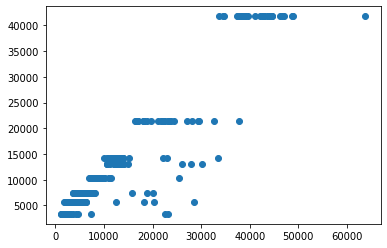

In [ ]:
plt.scatter(y_test,tuned_pred);

Gradient Boosting (Grid Search)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
GBR = GradientBoostingRegressor()

In [ ]:
params = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,500,1000, 1500],
                  'max_depth'    : [4,6,8,10]
           }

In [ ]:
grid_GBR = GridSearchCV(estimator=GBR, param_grid = params, cv = 2, n_jobs=-1)
grid_GBR.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'max_depth': [4, 6, 8, 10],
                         'n_estimators': [100, 500, 1000, 1500],
                         'subsample': [0.9, 0.5, 0.2, 0.1]})

In [ ]:
print("\n The best estimator:\n",grid_GBR.best_estimator_)
print("\n The best score:\n",grid_GBR.best_score_)
print("\n The best parameters:\n",grid_GBR.best_params_)


 The best estimator:
 GradientBoostingRegressor(learning_rate=0.03, max_depth=4, subsample=0.9)

 The best score:
 0.8385010448464382

 The best parameters:
 {'learning_rate': 0.03, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.9}


In [ ]:
best_params = {'learning_rate': [0.03],
                  'subsample'    : [0.9],
                  'n_estimators' : [100],
                  'max_depth'    : [4]
           }

In [ ]:
grid_GBR_best = GridSearchCV(estimator=GBR, param_grid = best_params, cv = 2, n_jobs=-1)

In [ ]:
grid_GBR_best.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.03], 'max_depth': [4],
                         'n_estimators': [100], 'subsample': [0.9]})

In [ ]:
gbr_pred=grid_GBR_best.predict(X_test)
print(gbr_pred)

[ 9841.64445603  6267.97242443 26921.32209511  9704.90368039
 33914.84695485  6419.17745313  3261.28944498 14538.65374164
  5320.71203812 10827.79751527 18850.30898854  8050.25194331
  6064.57823552 43053.99744702 45824.17036977 42856.58120208
 12546.13540676 42467.15344407 10988.60332127 24312.23448984
  7909.43148011  9831.69939818  3252.35147299  3457.49316288
 11381.24193665 12551.51651046 14325.02983423  7025.27145084
 10836.8325758   3316.66037202  8462.58289612 12731.9476264
  3667.53660911  6775.59263801  5691.91909607  9350.88122241
  4552.73517855  9310.23121601 23459.79522018 39495.03784078
  7492.11161708  4896.41647903 13182.15683006 14035.49071413
  7993.46777472 15053.3824861   7122.8902923   7470.87618161
 41425.50698116  6615.81385099 14291.60942688  4174.902468
  6985.51268538  2690.96836081 12688.46806049 11021.75921557
  4772.51992919 43819.27186756 12580.57772733 12279.16078831
 14228.05791623  6496.78279099 15633.5478998   8233.19974492
 11787.47850795  6094.03982

# 7. Modeli Değerlendirme

● Regresyon modeli değerlendirme metriklerini kullanarak optimize edilmiş olan
modelin değerlendirmesini yapınız. (Ör. Mean Squared Error, Mean Absolute Error
vb.)

In [ ]:
# With hyperparameter tuned Decision Tree Regressor
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test,tuned_pred))
print('MSE:', metrics.mean_squared_error(y_test, tuned_pred))

MAE: 2894.301647184614
MSE: 22111245.935431752


When you observe the above metrics for both decision tree regression models, we got good metrics (MSE 22111245) with the hyperparameter tuning model compared to the model without hyperparameter tuning.

In [ ]:
# With hyperparameter tuned Gradient Boosting Regressor
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, gbr_pred))
print('MSE:', metrics.mean_squared_error(y_test, gbr_pred))

MAE: 2660.180133051699
MSE: 19914886.215669863


Using Grid Search and hyperparameter tunning, the Gradient Boosting Regressor model gave a lower MSE result than the decision tree regressor (with hyperparameter tunning) model.